# Create dataframe with relevant data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:

import sqlite3


# Accessing local db
dbfile = 'databases/Global_Coral_Bleaching_Database_SQLite_11_24_21.db'

# Getting connection and cursor
con = sqlite3.connect(dbfile)
cur = con.cursor()

In [3]:
site_info = "Site_Info_tbl"
sample_info="Sample_Event_tbl"
eco_info = 'Ecoregion_Name_LUT'
bleaching_info = "Bleaching_tbl"
environmental_info = "Environmental_tbl"

In [4]:
# Retrieve base dataframes
site_df = pd.read_sql_query(f"SELECT * from {site_info}", con)
site_df=site_df.rename(columns={"Ecoregion_Name":"Ecoregion_ID"})

sample_df = pd.read_sql_query(f"SELECT * from {sample_info}", con)

eco_lut = pd.read_sql_query(f"SELECT * from {eco_info}", con)

bleaching_df = pd.read_sql_query(f"SELECT * from {bleaching_info}", con)

environmental_df = pd.read_sql_query(f"SELECT * from {environmental_info}", con)

# Link site info with ecoregion name
eco_site_join = pd.merge(site_df, eco_lut, how="inner", on="Ecoregion_ID")

# Link ecoregion name with samples
eco_site_sample_join = pd.merge(eco_site_join, sample_df, how="inner", on="Site_ID")
eco_site_sample__bleaching_join = pd.merge(eco_site_sample_join, bleaching_df, how="inner", on="Sample_ID")
eco_site_sample__bleaching_environmental_join = pd.merge(eco_site_sample__bleaching_join, environmental_df, how="inner", on="Sample_ID")
eco_site_sample__bleaching_environmental_join.head()



,Site_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_ID,Country_Name,State_Island_Province_Name,City_Town_Name,...,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,TRIAL501_y
0,1,5,-14.28,-170.715,1,2,90.0,94.0,20.0,3977.0,...,-0.752,1.0,2.238,11.4,1.0,0.0,1.428,9.594,0.564,T
1,2,5,-14.33,-170.500,1,2,90.0,94.0,20.0,3977.0,...,-0.850,0.0,1.520,8.0,1.0,0.0,0.960,8.090,0.340,T
2,2,5,-14.33,-170.500,1,2,90.0,94.0,20.0,3977.0,...,-0.850,0.0,1.520,8.0,1.0,0.0,0.960,8.090,0.340,T
3,2,5,-14.33,-170.500,1,2,90.0,94.0,20.0,3977.0,...,-0.850,1.0,1.520,8.0,1.0,0.0,0.960,8.090,0.340,T
4,2,5,-14.33,-170.500,1,2,90.0,94.0,20.0,3977.0,...,-0.850,1.0,1.520,8.0,1.0,0.0,0.960,8.090,0.340,T


In [5]:
# Filter to only location Bahamas and Florida Keys    
bahamas_florida_ecoregion_id = 6
top_ecoregion_df = eco_site_sample__bleaching_environmental_join[eco_site_sample__bleaching_environmental_join["Ecoregion_ID"] == bahamas_florida_ecoregion_id]
top_ecoregion_df

,Site_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_ID,Country_Name,State_Island_Province_Name,City_Town_Name,...,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,TRIAL501_y
6029,1212,5,23.764000,-76.120000,2,7,6.0,5.0,133.0,2674.0,...,-2.80,3.0,1.41,6.0,1.0,0.00,1.08,8.60,0.36,T
6030,1212,5,23.764000,-76.120000,2,7,6.0,5.0,133.0,2674.0,...,-2.80,1.0,1.41,6.0,1.0,0.00,1.08,8.60,0.36,T
6031,1212,5,23.764000,-76.120000,2,7,6.0,5.0,133.0,2674.0,...,-2.80,0.0,1.41,6.0,1.0,0.00,1.08,8.60,0.36,T
6032,1212,5,23.764000,-76.120000,2,7,6.0,5.0,133.0,2674.0,...,-2.80,1.0,1.41,6.0,1.0,1.01,1.08,8.60,0.36,T
6033,1212,5,23.764000,-76.120000,2,7,6.0,5.0,133.0,2674.0,...,-2.80,0.0,1.41,6.0,1.0,0.00,1.08,8.60,0.36,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,1000023,3,25.044933,-80.369867,2,7,6.0,94.0,143.0,2468.0,...,-3.27,0.0,0.86,4.0,0.0,0.00,0.60,5.36,0.15,T
10086,1000023,3,25.044933,-80.369867,2,7,6.0,94.0,143.0,2468.0,...,-3.27,0.0,0.86,4.0,0.0,0.00,0.60,5.36,0.15,T
10087,1000023,3,25.044933,-80.369867,2,7,6.0,94.0,143.0,2468.0,...,-3.27,0.0,0.86,4.0,0.0,0.00,0.60,5.36,0.15,T
10088,1000023,3,25.044933,-80.369867,2,7,6.0,94.0,143.0,2468.0,...,-3.27,0.0,0.86,4.0,0.0,0.00,0.60,5.36,0.15,T


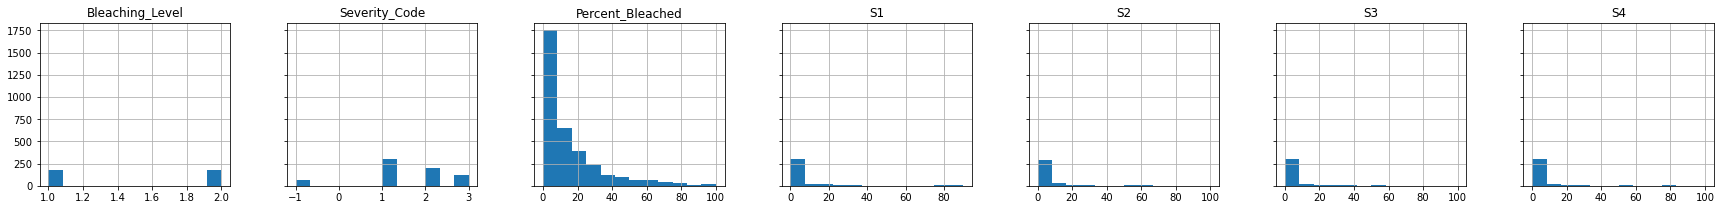

In [6]:
# Inspect bleaching data
bleaching_cols = ['Bleaching_Level', 'Severity_Code', 'Percent_Bleached', 'S1', 'S2', 'S3', 'S4']
num_cols = len(bleaching_cols)
inspect_df = top_ecoregion_df[bleaching_cols]
fig, ax = plt.subplots(1, num_cols, sharex='col', sharey='row', figsize=(30, 3))

for i in range(num_cols):
    inspect_df.hist(column = inspect_df.columns[i], bins = 12, ax=ax[i])

# choose columns based on available data
bleaching_cols = ['Percent_Bleached'] 
# TODO: can bleaching_level and sev_code + s1, s2, s3, s4 be used?

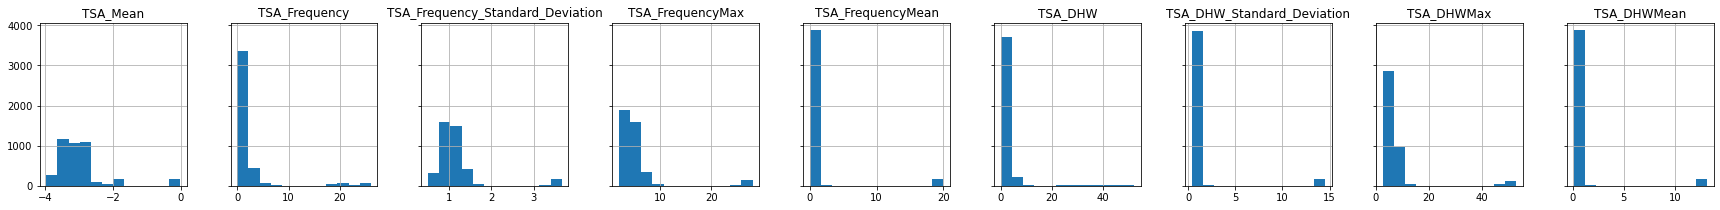

In [7]:
# Inspect TSA data
tsa_cols = ['TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']
num_cols = len(tsa_cols)
inspect_df = top_ecoregion_df[tsa_cols]
fig, ax = plt.subplots(1, num_cols, sharex='col', sharey='row', figsize=(30, 3))

for i in range(num_cols):
    inspect_df.hist(column = inspect_df.columns[i], bins = 12, ax=ax[i])

# choose columns based on available data
tsa_cols = ['TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']

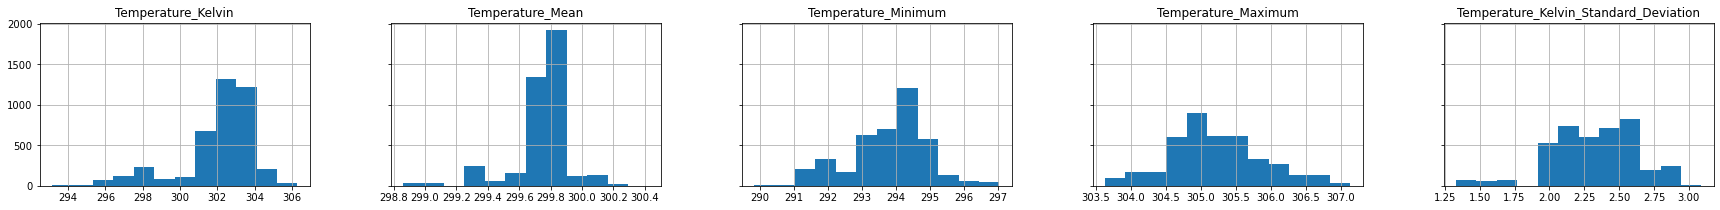

In [8]:
# Inspect Temperature data
temp_cols = ['Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum','Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',]
num_cols = len(temp_cols)
inspect_df = top_ecoregion_df[temp_cols]
fig, ax = plt.subplots(1, num_cols, sharex='col', sharey='row', figsize=(30, 3))

for i in range(num_cols):
    inspect_df.hist(column = inspect_df.columns[i], bins = 12, ax=ax[i])

# choose columns based on available data
temp_cols = ['Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum','Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',]

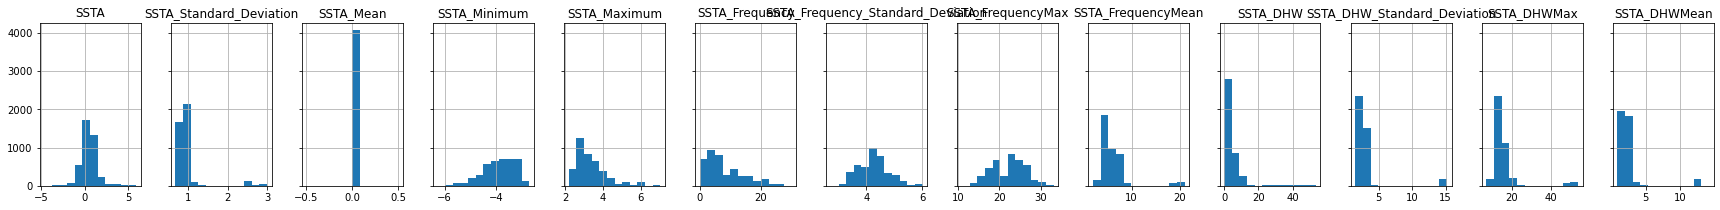

In [9]:
# Inspect SSTA data
ssta_cols = ['SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation','SSTA_DHWMax', 'SSTA_DHWMean',]
num_cols = len(ssta_cols)
inspect_df = top_ecoregion_df[ssta_cols]
fig, ax = plt.subplots(1, num_cols, sharex='col', sharey='row', figsize=(30, 3))

for i in range(num_cols):
    inspect_df.hist(column = inspect_df.columns[i], bins = 12, ax=ax[i])
# choose columns based on available data
ssta_cols = ['SSTA', 'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation','SSTA_DHWMax', 'SSTA_DHWMean',]

In [20]:
# Select features that can be used to classify
columns = ['Site_ID'] + bleaching_cols+tsa_cols+temp_cols+ssta_cols
print(columns)
features_df = top_ecoregion_df[columns]
features_df.head()

['Site_ID', 'Percent_Bleached', 'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean']


,Site_ID,Percent_Bleached,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
6029,1212,NaN,-2.8,3.0,1.41,6.0,1.0,0.00,1.08,8.6,...,-3.752222,3.49,6.0,4.88,25.0,7.0,0.00,3.09,19.21,2.68
6030,1212,NaN,-2.8,1.0,1.41,6.0,1.0,0.00,1.08,8.6,...,-3.752222,3.49,12.0,4.88,25.0,7.0,7.86,3.09,19.21,2.68
6031,1212,NaN,-2.8,0.0,1.41,6.0,1.0,0.00,1.08,8.6,...,-3.752222,3.49,5.0,4.88,25.0,7.0,2.79,3.09,19.21,2.68
6032,1212,NaN,-2.8,1.0,1.41,6.0,1.0,1.01,1.08,8.6,...,-3.752222,3.49,16.0,4.88,25.0,7.0,2.03,3.09,19.21,2.68
6033,1212,NaN,-2.8,0.0,1.41,6.0,1.0,0.00,1.08,8.6,...,-3.752222,3.49,9.0,4.88,25.0,7.0,1.10,3.09,19.21,2.68


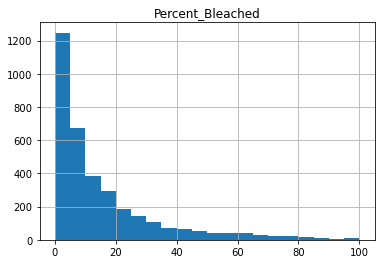

In [11]:
# Create categorical Percent_Bleached data
features_df = features_df.dropna(subset = ['Percent_Bleached'])
features_df.hist(column='Percent_Bleached', bins=20)

cutoff_bleach_percentage = 10
categories = ['No bleaching', 'Some bleaching', 'Severe bleaching']
categories_intervals = {'No bleaching': (-1, 0), 'Some bleaching': (0.0001, cutoff_bleach_percentage), 'Severe bleaching': (cutoff_bleach_percentage, 101)}

In [12]:
no_bleaching = []
some_bleaching = []
severe_bleaching = []
categorical_values = []
for bleaching_value in features_df['Percent_Bleached']:
    if bleaching_value == 0:
        no_bleaching.append(bleaching_value)
        categorical_values.append(0)
    elif 0 < bleaching_value < cutoff_bleach_percentage:
        some_bleaching.append(bleaching_value)
        categorical_values.append(1)
    elif bleaching_value >= cutoff_bleach_percentage:
        severe_bleaching.append(bleaching_value)
        categorical_values.append(2)
    else: 
        print(bleaching_value)

print(f"no_bleaching: {len(no_bleaching)}")     
print(f"some_bleaching: {len(some_bleaching)}")    
print(f"severe_bleaching: {len(severe_bleaching)}")    

no_bleaching: 478
some_bleaching: 1444
severe_bleaching: 1538


In [13]:
# add coulmn to df
features_df.loc[:, ('Categorical_Percent_Bleached')] = categorical_values
#features_df['Categorical_Percent_Bleached'] = 
features_df[['Percent_Bleached','Categorical_Percent_Bleached']].head(5)

,Percent_Bleached,Categorical_Percent_Bleached
6038,10.000000,2
6039,8.000000,1
6040,33.000000,2
6041,8.000000,1
6046,0.833333,1


In [14]:
X_columns = [
    'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 
    'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 
    'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean'
]
X_df = features_df[X_columns]
X_df.fillna(0)
#print(X_df)
X = X_df.to_numpy()
X

array([[-2.63,  0.  ,  0.84, ...,  2.53, 14.81,  2.02],
       [-3.04,  1.  ,  1.27, ...,  3.  , 16.21,  2.31],
       [-3.04,  0.  ,  1.27, ...,  3.  , 16.21,  2.31],
       ...,
       [-3.27,  0.  ,  0.86, ...,  2.28, 12.36,  1.78],
       [-3.27,  0.  ,  0.86, ...,  2.28, 12.36,  1.78],
       [-3.27,  0.  ,  0.86, ...,  2.28, 12.36,  1.78]])

In [15]:
y_columns = ['Categorical_Percent_Bleached']
y_df = features_df[y_columns]
y = y_df.to_numpy().ravel()

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.decomposition import IncrementalPCA

In [17]:
X = np.nan_to_num(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [18]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"accuracy = {accuracy}")


balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"balanced_accuracy = {balanced_accuracy}")


accuracy = 0.5849387040280211
balanced_accuracy = 0.5300738759324081


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC #(setting multi_class=”crammer_singer”)
from sklearn.ensemble import RandomForestClassifier


def evaluate_classifier(clf, name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{name} \t accuracy = {accuracy} \t balanced_accuracy = {balanced_accuracy}")
    return accuracy, balanced_accuracy, name


def evaluate_classifiers(classifiers, names):
    best_accuracy = 0
    best_accuracy_clf = None
    best_balanced_accuracy = 0
    best_balanced_accuracy_clf = None
    for clf, name in zip(classifiers, names):
        accuracy, balanced_accuracy, clf_name = evaluate_classifier(clf, name)
        if accuracy > best_accuracy:
            best_accuracy = accuracy 
            best_accuracy_clf = clf_name
        if balanced_accuracy> best_balanced_accuracy:
            best_balanced_accuracy = balanced_accuracy
            best_balanced_accuracy_clf = clf_name
    print(f"\n\nBEST ACCURACY = {best_accuracy} \t {best_accuracy_clf}")
    print(f"\n\nBEST BALANCED ACCURACY = {best_balanced_accuracy} \t {best_balanced_accuracy_clf}")
        
classifiers = [LinearDiscriminantAnalysis(), BernoulliNB(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), LinearSVC(multi_class="crammer_singer"), QuadraticDiscriminantAnalysis(), RandomForestClassifier(), SVC()]
names =       ['LDA',                       'BernoulliNB', 'GaussianNB','DecisionTreeClassifier',  'KNeighborsClassifier',              'LinearSVC',                             'QDA',                           'RandomForestClassifier', 'SVC']

evaluate_classifiers(classifiers, names)

LDA 	 accuracy = 0.5849387040280211 	 balanced_accuracy = 0.5300738759324081
BernoulliNB 	 accuracy = 0.5341506129597198 	 balanced_accuracy = 0.4145020465753042
GaussianNB 	 accuracy = 0.4071803852889667 	 balanced_accuracy = 0.4498515947651612
DecisionTreeClassifier 	 accuracy = 0.6611208406304728 	 balanced_accuracy = 0.6488774139874809
KNeighborsClassifier 	 accuracy = 0.6611208406304728 	 balanced_accuracy = 0.6306836445691372
LinearSVC 	 accuracy = 0.39316987740805603 	 balanced_accuracy = 0.335202492211838
QDA 	 accuracy = 0.6077057793345009 	 balanced_accuracy = 0.5821793890304813
RandomForestClassifier 	 accuracy = 0.6987740805604203 	 balanced_accuracy = 0.6634332486208295
SVC 	 accuracy = 0.47723292469352013 	 balanced_accuracy = 0.3414288308676641


BEST ACCURACY = 0.6987740805604203 	 RandomForestClassifier


BEST BALANCED ACCURACY = 0.6634332486208295 	 RandomForestClassifier


#### Some comments about this notebook:
- It could be better to have more categories. Right now 10% bleached and 88% bleached are in the same category. Does this really provide any value? The "problem" is that there is very little data available in the >50% bleached interval.
- The classification is very basic. No tuning of parameters has been attempted. 